###  Método de continuación

In [1]:
%display latex

In [35]:
def tangente(A):
    A = matrix(CDF, A)
    Q, R = A.transpose().QR()
    tang = Q.columns()[-1]
    signo = Q.determinant() * R[:-1,:].determinant()
    return tang  

def invMoorePenrose(A):
    return A.transpose()*(A*A.transpose()).inverse()

def var_subs(variables, values):
    return {str(va): ui for va, ui in zip(variables, values)}

def EulerNewtonContinuacionHomotopica(H, variables, x0=None, eps=0.001, h=0.025, N=100, M=10):
    J = jacobian(H, variables)
    if x0 is None:
        x0 = (random() for _ in variables[:-1])
    u0 = vector((*x0, 0))
    uk = [u0]
    for k in [1..N]:
        u = uk[k-1]
        if u[-1]+eps > 1:
            break
        v = u + h*tangente(J(**var_subs(variables, u)))
        for j in [1..M]:
            correction = invMoorePenrose(J(**var_subs(variables, v)))*H(**var_subs(variables, v))
            if correction.norm() < eps:
                break
            v = v - correction
        uk.append(v)
    return uk

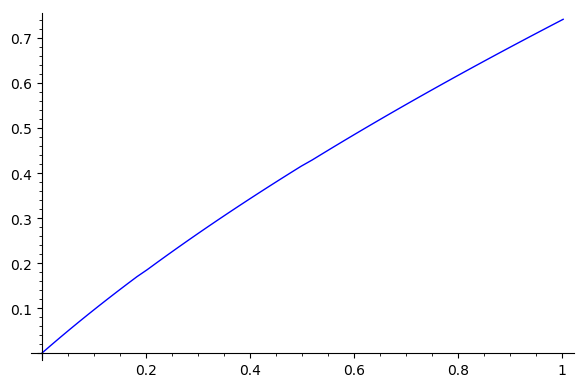

In [36]:
f(x) = cos(x)-x
x0 = (0,)
H(x,t) = (f(x)-(1-t)*f(*x0),)
uk = EulerNewtonContinuacionHomotopica(H, (x,t), x0=x0)
line([(u[1], u[0]) for u in uk])

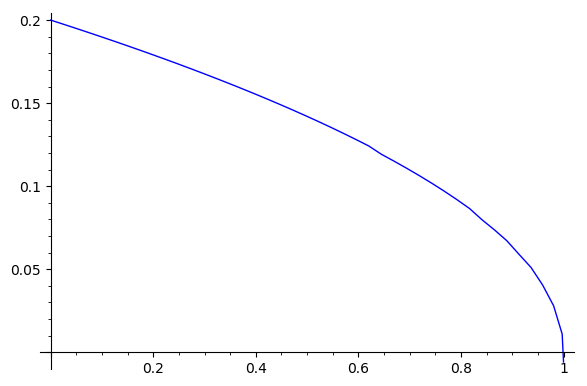

In [37]:
f(x) = x^2
x0 = vector((0.2,))
H(x,t) = (f(x)-(1-t)*f(*x0),)
uk = EulerNewtonContinuacionHomotopica(H, (x,t), x0=x0)
line([(u[1], u[0]) for u in uk])

In [38]:
uk

[(0.200000000000000, 0.000000000000000),
 (0.19751240702447503, 0.02487592975524973),
 (0.1949937997961722, 0.04974873855581628),
 (0.19244299789793062, 0.07461826628908712),
 (0.18985874445861042, 0.0994843402486281),
 (0.18723969906204915, 0.12434677378218935),
 (0.18458442978997544, 0.14920536475377866),
 (0.18189140426633568, 0.17405989378832334),
 (0.1791589795458858, 0.19891012226105725),
 (0.1763853906598828, 0.22375578998586274),
 (0.17356873759489194, 0.24859661254695112),
 (0.17070697043530816, 0.27343227820592486),
 (0.16779787234382917, 0.29826244430070065),
 (0.16483903998373364, 0.3230867330330058),
 (0.16182786089832818, 0.34790472651587256),
 (0.15876148725087957, 0.3727159609199532),
 (0.15563680518539247, 0.3975199195150973),
 (0.1524503988847207, 0.4223160243480552),
 (0.14919850816395167, 0.44710362622359323),
 (0.14587697812464379, 0.4718819925579175),
 (0.14248119898241107, 0.49665029254029774),
 (0.1390060336281905, 0.5214075788568718),
 (0.13544572973692576, 0.5

In [39]:
uk[-1]

(-0.005849892373111698, 0.9998048912137713)

In [40]:
f1(x,y,z) = 3*x - cos(y*z) - 1/2
f2(x,y,z) = x^2 - 81*(y+0.1)^2 + sin(z) + 1.06
f3(x,y,z) = exp(-x*y) + 20*z + (10*pi-3)/3
F(x,y,z) = (f1(x,y,z),f2(x,y,z),f3(x,y,z))
x0 = vector((0.1,0.1,-0.1))
H = F(x,y,z)-(1-t)*F(*x0)
uk = EulerNewtonContinuacionHomotopica(H, (x,y,z,t), x0=x0)

In [41]:
uk[-1]

(0.5045772525708495, -0.0007273016250390067, -0.5284161247409224, 1.0114447327469809)